In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [4]:
x,y = load_diabetes(return_X_y=True)

In [6]:
x.shape

(442, 10)

In [7]:
y.shape

(442,)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
x_train, x_test , y_train, y_test = train_test_split(x,y , test_size=0.2,random_state=2)

In [10]:
x_train.shape

(353, 10)

In [23]:
x_test.shape

(89, 10)

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(x_test)

In [20]:
r2_score(y_test,y_pred)

0.439933866156897

In [21]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [22]:
lr.intercept_

151.88331005254167

In [33]:
class meralinear():

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None


    def fit(self,x_train, y_train):
        x_train = np.insert(x_train,0,1,axis=1)

        betas = np.linalg.inv((x_train.T).dot(x_train)).dot(x_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def pred(self,x_test):
        return x_test.dot(self.coef_) + self.intercept_    
            

In [34]:
L = meralinear()

In [35]:
L.fit(x_train,y_train)

In [38]:
y_pred = L.pred(x_test)

In [39]:
r2_score(y_test,y_pred)

0.43993386615689745

In [44]:
url = "https://www.statlearning.com/s/Advertising.csv"
df = pd.read_csv(url,usecols=['TV','radio','newspaper','sales'])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [47]:
df.to_csv("C:\\Users\\sanja\\Downloads\\Advertising.csv",index=False)

In [45]:
df.shape

(200, 4)

In [48]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

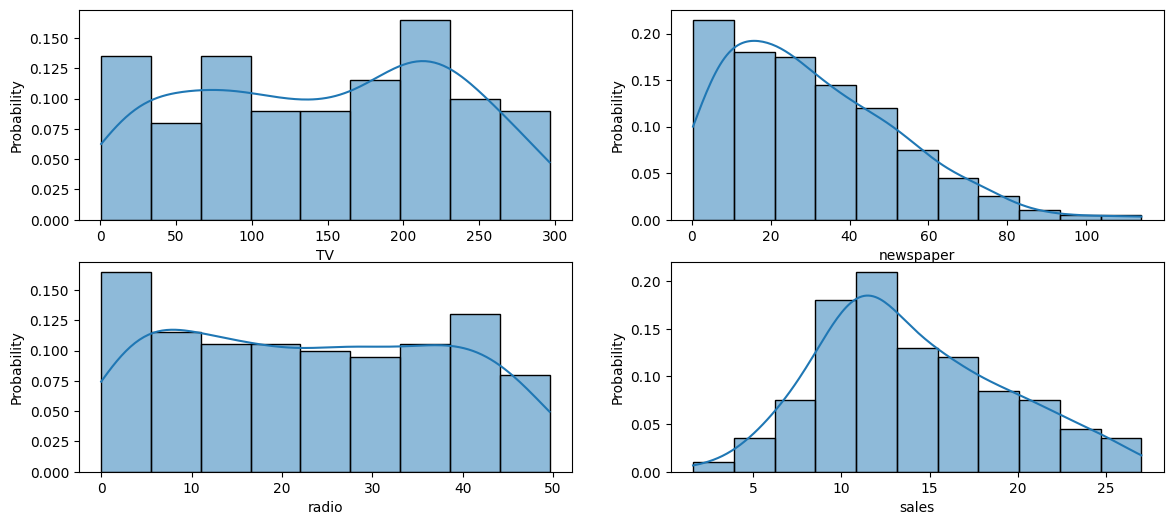

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
sns.histplot(df['TV'],kde=True,stat='probability')

plt.subplot(2,2,2)
sns.histplot(df['newspaper'], kde=True, stat='probability')

plt.subplot(2,2,3)
sns.histplot(df['radio'], kde=True,stat='probability')

plt.subplot(2,2,4)
sns.histplot(df['sales'],kde=True,stat='probability')

plt.show()

In [51]:
print("Tv upper limit", df['TV'].mean() + 3*df['TV'].std())
print("Tv lower limit", df['TV'].mean() - 3*df['TV'].std())

Tv upper limit 404.60520894472427
Tv lower limit -110.52020894472426


In [52]:
df[(df['TV'] > 404) | (df['TV'] < -110)]

,TV,radio,newspaper,sales


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [56]:
x = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [60]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(x_test)

In [68]:
y_test.values

array([14.1, 10.5,  8.7, 13.4, 19.6, 15.2,  8.6, 20.2, 12.6, 12.8,  9.2,
       19.4,  9.7,  6.6, 11.5,  9.3,  8.5, 18.5, 15.9, 19. , 15.5, 12. ,
       11.8, 10.8, 11.9, 11.7, 14.9,  9.3, 14.8, 11.6, 11.8, 18. , 10.6,
       13.2,  5.3, 12.4, 24.7, 20.2, 12.7, 21.2])

In [70]:
r2_score(y_test,y_pred)

0.7575894500772717